In [22]:
import tkinter as tk
from PIL import Image, ImageTk
from tkinter import filedialog
import numpy as np
import random
import math
from matplotlib import pyplot as plt
import cv2

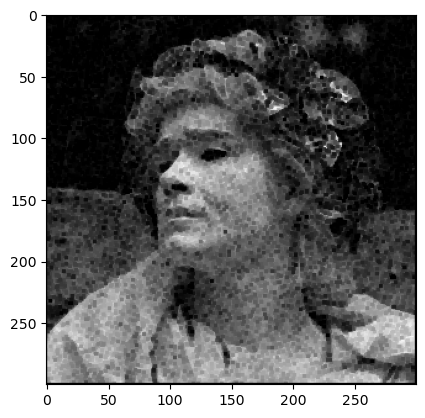

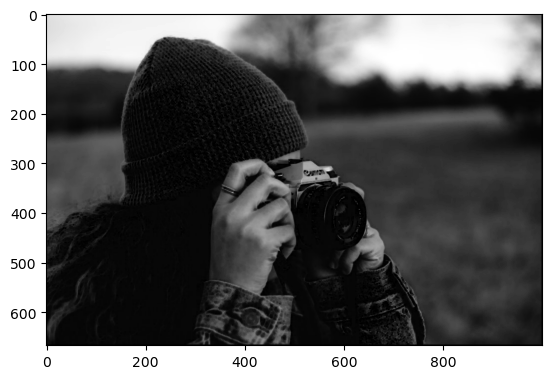

In [41]:
window = tk.Tk()
window.title("Image Viewer")
screen_width = window.winfo_screenwidth()
screen_height = window.winfo_screenheight()
window_width = int(screen_width * 0.7)
window_height = int(screen_height * 0.7)
window.geometry(f"{window_width}x{window_height}")
window.configure(bg="lightgray")

file_path=""
def open_image():
    global file_path
    file_path = filedialog.askopenfilename(filetypes=[("Image files", "*.jpg;*.jpeg;*.png;*.gif")])
    if file_path:              
        image = Image.open(file_path)
        image_width, image_height = image.size       
        max_width = window_width // 2
        max_height = window_height //2
        scale = min(max_width / image_width, max_height / image_height)
        new_width = int(image_width * scale)
        new_height = int(image_height * scale)
        image = image.resize((new_width, new_height))
        photo = ImageTk.PhotoImage(image)

        if hasattr(window, "label"):
            window.label.configure(image=photo, bd=5, relief="solid")
            window.label.image = photo
        else:
            window.label = tk.Label(window, image=photo, borderwidth=5, relief="solid")
            window.label.place(x=10, y=(window_height - new_height) // 2)
            window.label.image = photo
                            

def make_img(image):    
    plt.imshow(image,'gray')
    plt.show()
    image = Image.fromarray(image)
    photo = ImageTk.PhotoImage(image)
    if hasattr(window, "label"):
        window.label.configure(image=photo, bd=5, relief="solid")
        window.label.image = photo
    else:
        window.label = tk.Label(window, image=photo, borderwidth=5, relief="solid")
        window.label.place(x=200, y=(window_height - new_height) // 2)
        window.label.image = photo
    

def get_mean(image,row,col):
    tot=0  
    for r in range(0,row):
        for c in range(0,col):        
            tot+=image[r,c]
    return tot/(row*col)


def get_std_dev(image,row,col,mean):
    tot=0  
    for r in range(0,row):
        for c in range(0,col):        
            tot+=pow(image[r,c]-mean,2)
    tot= tot/(row*col)
    tot=math.sqrt(tot)
    return tot

def my_gauss(mean, std_dev):   
    u1 = np.random.rand()
    u2 = np.random.rand()
    z = np.sqrt(-2.0 * np.log(u1)) * np.cos(2.0 * 3.14 * u2)
    x = mean + std_dev * z
    return x


def switch_function():
    if current_function.get() == "Median":
        median_filter()
    elif current_function.get() == "Averaging":
        Averaging()
    elif current_function.get() == "Adaptive max":
        image=Adaptive_max(3)
        make_img(image)
    elif current_function.get() == "Adaptive min":
        image=Adaptive_min(3)
        make_img(image)
    elif current_function.get() == "Gaussian":
        image=Gaussian(3)
        make_img(image)
    elif current_function2.get() == "Laplacian Operator":
        image=Laplacian_Operator()
        make_img(image)
    elif current_function2.get() == "Unsharp Masking and Highboost Filtering":
        image=Unsharp_Masking_and_Highboost_Filtering()
        make_img(image)
    elif current_function2.get() == "Roberts Cross-Gradient Operators":
        image=Roberts_Cross_Gradient_Operators()
        make_img(image)
    elif current_function2.get() == "Sobel Operators":
        image=Sobel_Operators()
        make_img(image)
    elif current_function3.get() == "Impulse noise":
        image=Impulse_noise(0.05)
        make_img(image)
    elif current_function3.get() == "Gaussian noise":
        image=Gaussian_noise()
        make_img(image)
    elif current_function3.get() == "Uniform noise":
        image=Uniform_noise(0,70)        
        make_img(image)

        

def median_filter():
    print("Median")
    
def Averaging():
    print("Averaging")

def Adaptive_min(kernel_size):
    image=cv2.imread(file_path,0)
    kernel = kernel_size // 2
    filtered_image = np.zeros_like(image)  
    
    padded_image = np.zeros(
        (image.shape[0] + 2 * kernel, image.shape[1] + 2 * kernel),
        dtype=image.dtype)
    
    padded_image[kernel:-kernel, kernel:-kernel] = image
        
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            neighborhood = padded_image[i:i+kernel_size, j:j+kernel_size] 
            val = np.sort(neighborhood.flatten())
            min_value = np.min(val)        
            filtered_image[i, j] = min_value                
    return filtered_image
    
def Adaptive_max(kernel_size):    
    image=cv2.imread(file_path,0)
    kernel = kernel_size // 2
    filtered_image = np.zeros_like(image)      
    padded_image = np.zeros(
        (image.shape[0] + 2 * kernel, image.shape[1] + 2 * kernel),
        dtype=image.dtype)
    
    padded_image[kernel:-kernel, kernel:-kernel] = image
        
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            neighborhood = padded_image[i:i+kernel_size, j:j+kernel_size] 
            val = np.sort(neighborhood.flatten())
            min_value = np.max(val)        
            filtered_image[i, j] = min_value                
    return filtered_image
    
def Gaussian(kernel):
    image=cv2.imread(file_path,0)
    temp = image.copy()
    avg = 0
    for x in range(0, image.shape[0] - kernel):
        for y in range(0, image.shape[1] - kernel):
            for i in range(0, kernel):
                for j in range(0, kernel):
                        avg = avg + temp[x + i, y + j]
            temp[x, y] = avg / 25
            avg = 0
    filtered = temp - image
    filtered_image = filtered + image
    return filtered_image

def Laplacian_Operator():
    image=cv2.imread(file_path,0)
    avg_img = np.zeros_like(image)     
    kernel = np.array([[0, 1, 0],
                   [1, -4, 1],
                   [0, 1, 0]])

    for i in range(1, image.shape[0]-1):
        for j in range(1, image.shape[1]-1):
            local_sum = 0
            for k in range(-1,2):
                for l in range(-1,2):
                    local_sum+= kernel[k+1,l+1]*image[i+k,j+l]
            avg_img[i,j]=local_sum
    return avg_img

def Unsharp_Masking_and_Highboost_Filtering():
    image=cv2.imread(file_path,0)
    image_after = np.copy(image)
    image_array = np.array(image)
    kernel = np.array([[0, -1, 0],
                       [-1, 5, -1],
                       [0, -1, 0]])
    unsharpened_image = np.zeros_like(image_array)
    for i in range(1, image_array.shape[0]-1):
        for j in range(1, image_array.shape[1]-1):
            unsharpened_image[i, j] = np.clip(np.sum(image_array[i-1:i+2, j-1:j+2] * kernel), 0, 255)
    boosted_image = image_array + (unsharpened_image - image_array) * 1.5
    boosted_image = np.clip(boosted_image, 0, 255).astype(np.uint8)
    return boosted_image

def Roberts_Cross_Gradient_Operators():
    image=cv2.imread(file_path,0)
    kernel_x = np.array([[1, 0],
                         [0, -1]])
    kernel_y = np.array([[0, 1],
                         [-1, 0]])
    padded_image = np.pad(image, 1, mode='edge')
    gradient_x = np.zeros_like(image, dtype=np.float32)
    gradient_y = np.zeros_like(image, dtype=np.float32)
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            gradient_x[i, j] = np.sum(kernel_x * padded_image[i:i+2, j:j+2])
            gradient_y[i, j] = np.sum(kernel_y * padded_image[i:i+2, j:j+2])

    gradient_x+=gradient_y
    image=gradient_x
    return image
    

def Sobel_Operators():
    gray=cv2.imread(file_path,0)
    img = cv2.blur(gray,(3,3),0)
    sobelx = cv2.Sobel(img,-1,1,0,ksize=3) 
    sobely = cv2.Sobel(img,-1,0,1,ksize=3)  
    sobels = sobelx +sobely+img
    return sobels

def Impulse_noise(prob):
    image=cv2.imread(file_path,0)
    r,c = image.shape  
    noisy = image.copy()
    for i in range(r):
        for j in range(c):                       
            if np.random.rand() < prob:
                if np.random.rand() < 0.5: 
                    noisy[i, j] = 0  
                else:
                     noisy[i, j]=255
    return noisy


def Gaussian_noise(): 
    image=cv2.imread(file_path,0)
    r,c = image.shape  
    noisy = image.copy()
    mean=get_mean(image,r,c)
    std_dev=get_std_dev(image,r,c,mean)
    for y in range(r):
          for x in range(c):                    
                noise = int(my_gauss(mean, std_dev))
                noisy[y, x] = min(255, max(0, noisy[y, x] + noise))
    return noisy
    
def Uniform_noise(low, high):    
    image=cv2.imread(file_path,0)
    r,c = image.shape  
    noisy = image.copy()
    for y in range(r):
          for x in range(c):
                noise = random.randint(low, high)
                noisy[y, x] = min(255, max(0, noisy[y, x] + noise))     
    return noisy

        

def toggle_dark_mode():
    if dark_mode.get() == 1:
        window.configure(bg="black")
        button_frame.configure(bg="black")
        button_switch.configure(bg="red", fg="white", activebackground="lightblue", activeforeground="white")
        button_open.configure(bg="red", fg="white", activebackground="lightgreen", activeforeground="white")
        function_menu.configure(bg="lightgray", relief="raised", fg="black")
        dark_mode_toggle.configure(bg="black", fg="white")
    else:
        window.configure(bg="lightgray")
        button_frame.configure(bg="lightgray")
        button_switch.configure(bg="blue", fg="white", activebackground="lightblue", activeforeground="white")
        button_open.configure(bg="green", fg="white", activebackground="lightgreen", activeforeground="white")
        function_menu.configure(bg="lightgray", relief="raised", fg="black")
        dark_mode_toggle.configure(bg="lightgray", fg="black")


button_frame = tk.Frame(window, bg="lightgray")
button_frame.pack(pady=10)

button_switch = tk.Button(button_frame, text="Apply filter", command=switch_function,
                          relief="raised", padx=10, pady=5, activebackground="lightblue", activeforeground="white",
                          bg="blue", fg="white")
button_switch.pack(side= "left", padx=10)

button_open = tk.Button(button_frame, text="Open Image", command=open_image,
                        relief="raised", padx=10, pady=5, activebackground="lightgreen", activeforeground="white",
                        bg="green", fg="white")

button_open.pack(side="left", padx=10)

current_function = tk.StringVar(window)
current_function2 = tk.StringVar(window)
current_function3 = tk.StringVar(window)

current_function.set("Smoothing Spatial filters")
function_menu = tk.OptionMenu(button_frame, current_function, "Median", "Averaging", "Adaptive max", "Adaptive min", "Gaussian")
function_menu.configure(bg="lightgray", relief="raised")
function_menu.pack(side="left", padx=10)

current_function2.set("Sharpening Spatial filters")
function_menu2 = tk.OptionMenu(button_frame, current_function2,"Laplacian Operator" , "Unsharp Masking and Highboost Filtering"
                               , "Roberts Cross-Gradient Operators" , "Sobel Operators")
function_menu2.configure(bg="lightgray", relief="raised")
function_menu2.pack(side="left", padx=10)

current_function3.set("Noise filters")
function_menu3 = tk.OptionMenu(button_frame, current_function3, "Impulse noise" , "Gaussian noise" , "Uniform noise")
function_menu3.configure(bg="lightgray", relief="raised")
function_menu3.pack(side="left", padx=10)

dark_mode = tk.IntVar()
dark_mode_toggle = tk.Checkbutton(window, text="Dark Mode", variable=dark_mode, command=toggle_dark_mode, bg="lightgray")
dark_mode_toggle.pack(pady=10)
dark_mode_toggle.pack(side="right", anchor="ne", padx=10, pady=10)

window.mainloop()